Let's do a grid search on different sigma_s for the standard configuration, with euclidian distance definition

In [27]:
%run ./DataGen2.ipynb

In [2]:
class Standard_Param():
    def __init__(self, NumberOfClusters = 40):
        # Region of interest :
        self.x_lim = [0, 4] # micrometer
        self.y_lim = [0, 4]

        # Clusters :
        self.NumberOfClusters = NumberOfClusters
        self.LocPerCluster    = [24] * self.NumberOfClusters
        self.r                = [30] * self.NumberOfClusters # nm
        self.cluster_shape    = 'uniform'

        # Noise :
        self.NoisePercentage  = 0.5 # between 0 adn 0.8
        self.UniformNoise     = True 
        
        # SMLM points : 
        self.mean_uncertainty      = 20
        self.dev_uncertainty       = 3
        self.N_photons             = 15000
        
        # Scales : 
        self.NumberOfScales   = 1

In [3]:
def Call_DataGenerator(p):
    datagen = DataGenerator(x_lim = p.x_lim,
                        y_lim = p.y_lim,
                        NumberOfClusters = p.NumberOfClusters,
                        LocPerCluster = p.LocPerCluster,
                        r = p.r,
                        NoisePercentage = p.NoisePercentage,
                        NumberOfScales = p.NumberOfScales,
                        cluster_shape = p.cluster_shape,
                        UniformNoise = p.UniformNoise, 
                        mean_delta = p.mean_uncertainty, 
                        dev_delta = p.dev_uncertainty,
                        N_photons = p.N_photons)
    return datagen

In [21]:
p = Standard_Param()
p.NoisePercentage = 0.6
p.LocPerCluster = [10] * p.NumberOfClusters
datagen = Call_DataGenerator(p)

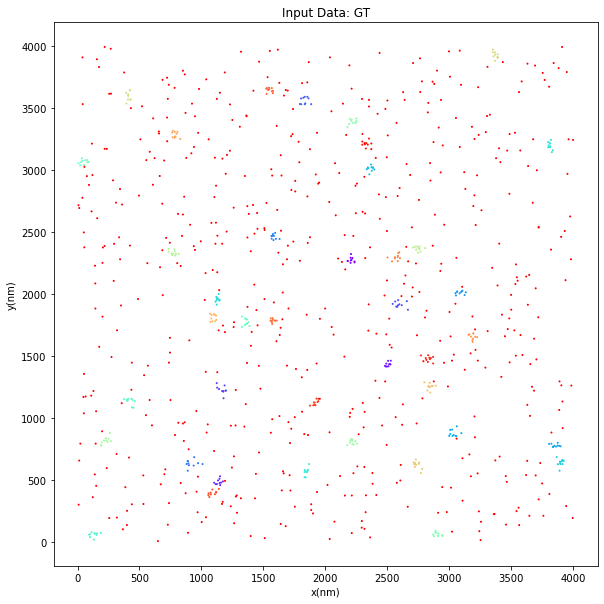

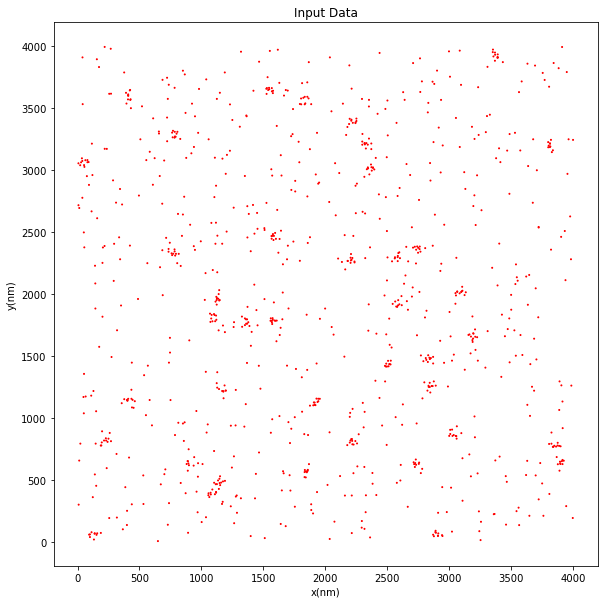

In [22]:
datagen.plot_points()

In [23]:
def grid_search(datagen, all_sigma_s, cluster_min_size =5):
    
    N = len(datagen.GetPoints())
    csr = CsrGenerator(N = N, x_lim = [0,4], y_lim = [0,4])
    Sigma = datagen.GetPointsCovMatrix()
    Sigma = np.asarray(Sigma)
    P = datagen.GetPointsCoord()
    truelabels = np.asarray(datagen.GetPointsLabels())
    df = datagen.GetAllData()
    
    
    all_FMI = []
    all_NumberOfClusters = []
    
    for sigma_s in all_sigma_s: 
        T = compute_T_95(N, Sigma,  sigma_s = sigma_s, x_lim = [0,4], y_lim = [0,4])

        density, G = compute_density(P, Sigma, sigma_s)

        labels = calling_graphic(df, sigma_s, T)
        labels_clean = remove_small_clusters(labels, 5)
        FMI  = metrics.fowlkes_mallows_score(truelabels, labels_clean)
        NumberOfClusters= len(np.unique(labels_clean))-1
        all_FMI.append(FMI)
        all_NumberOfClusters.append(NumberOfClusters)
    
    return all_FMI, all_NumberOfClusters
    

In [31]:
all_sigma_s = np.arange(15, 25, 2)

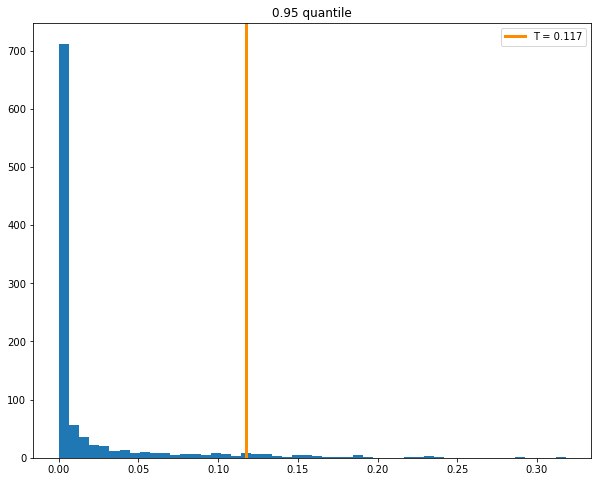

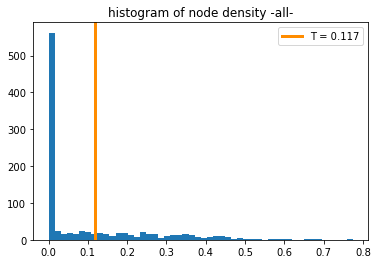

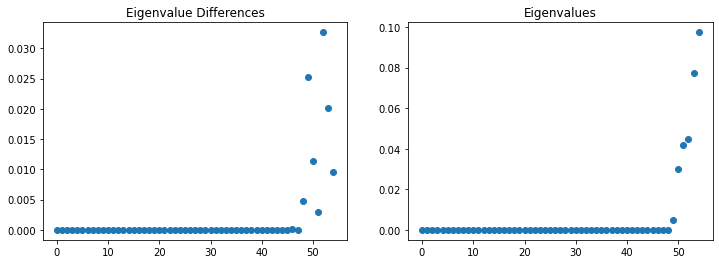

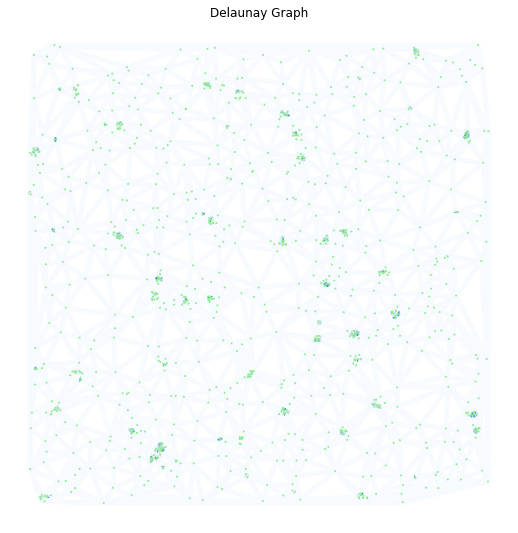

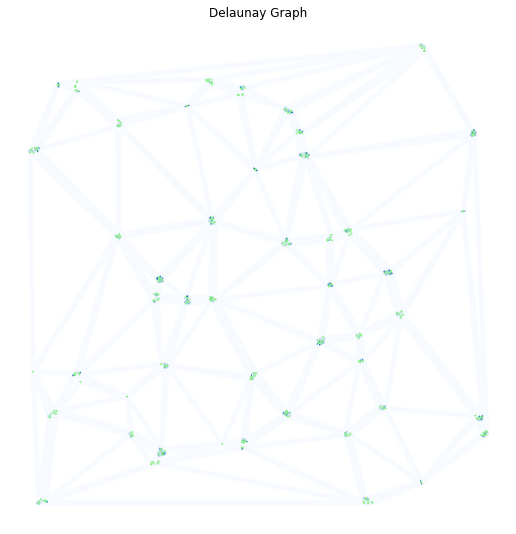

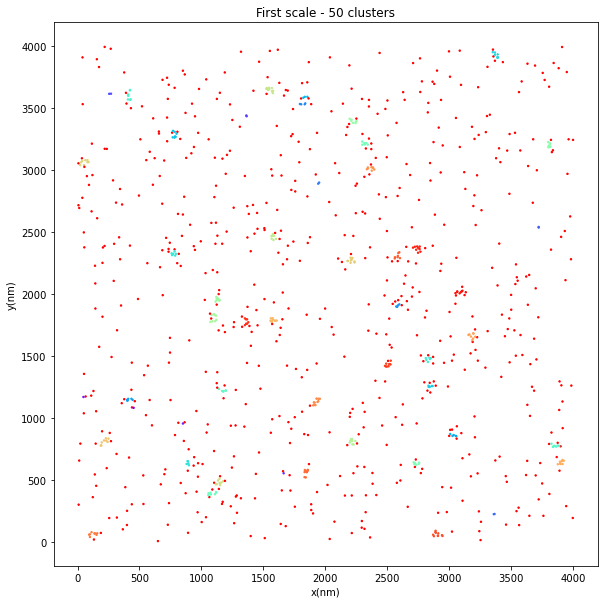

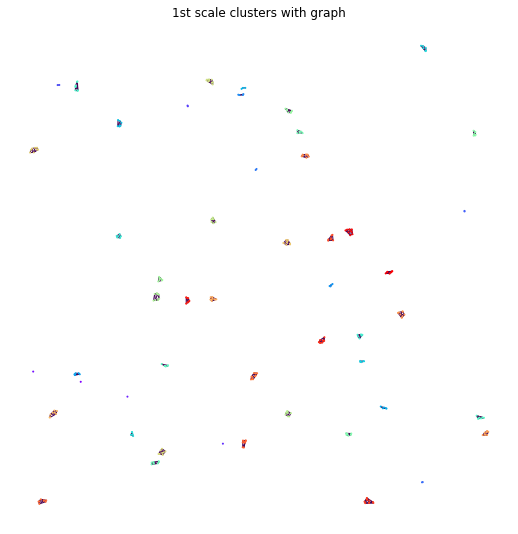

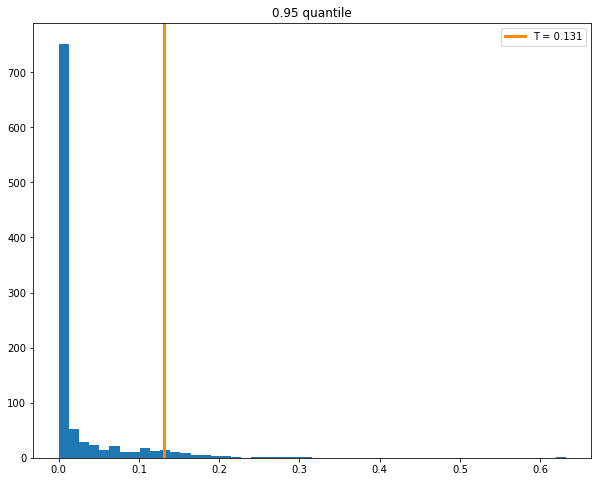

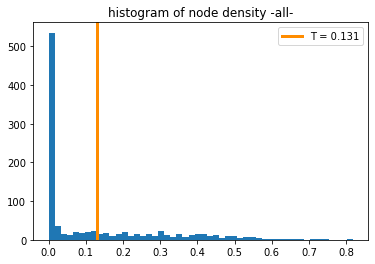

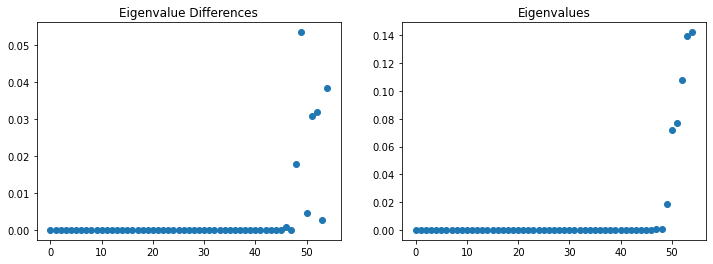

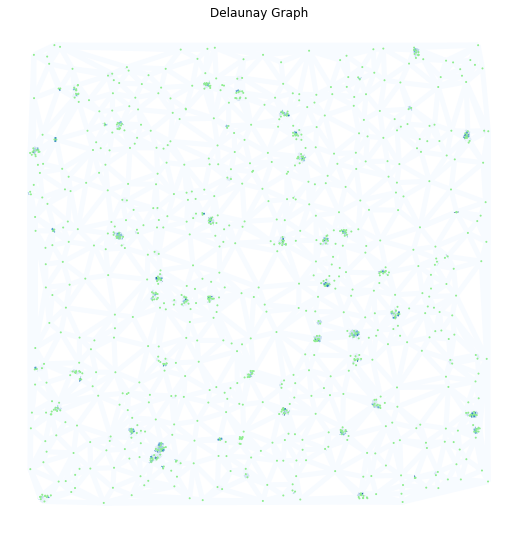

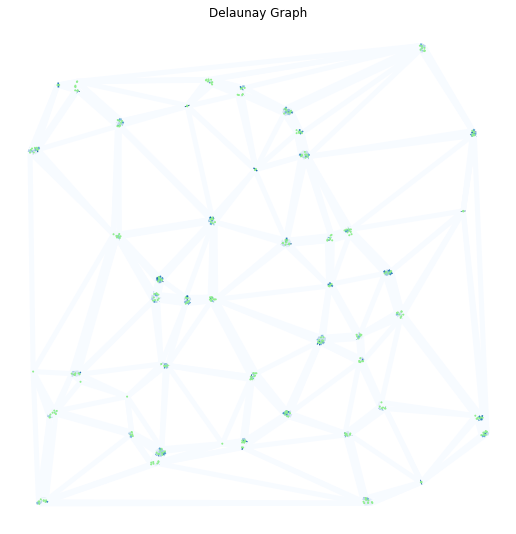

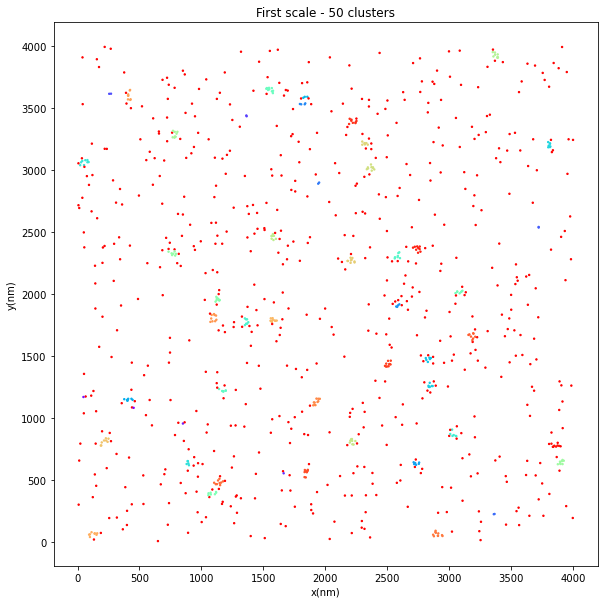

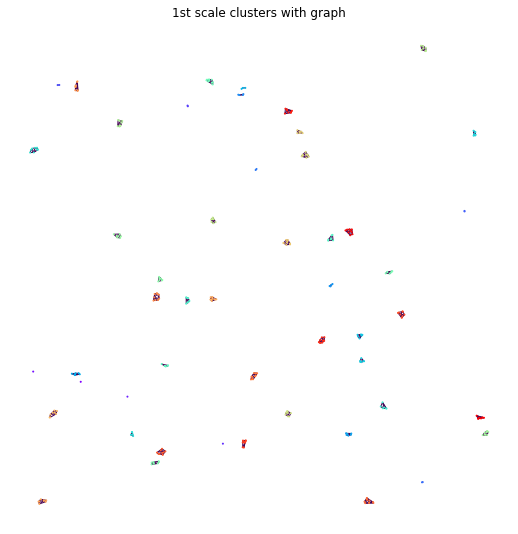

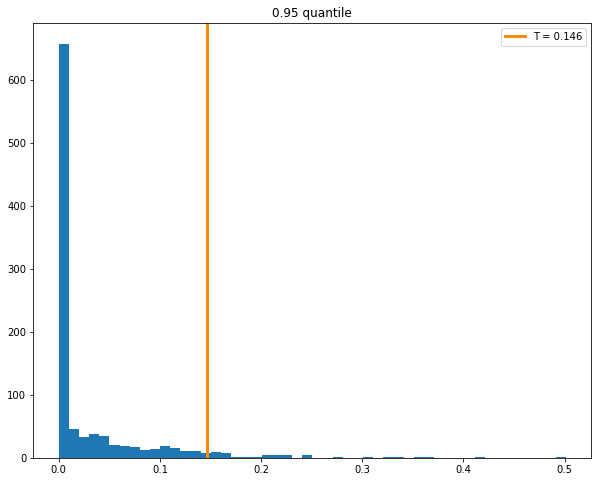

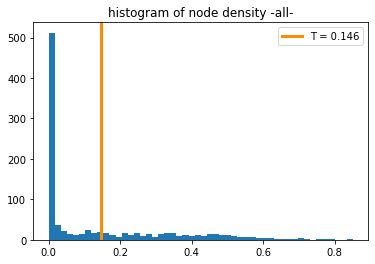

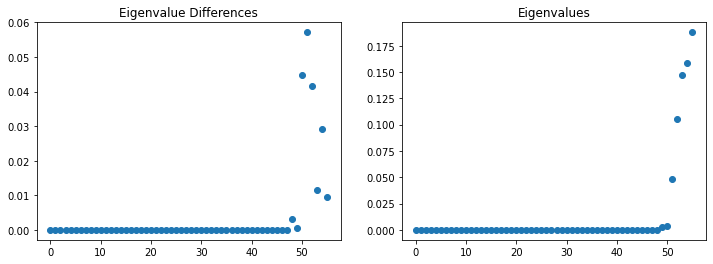

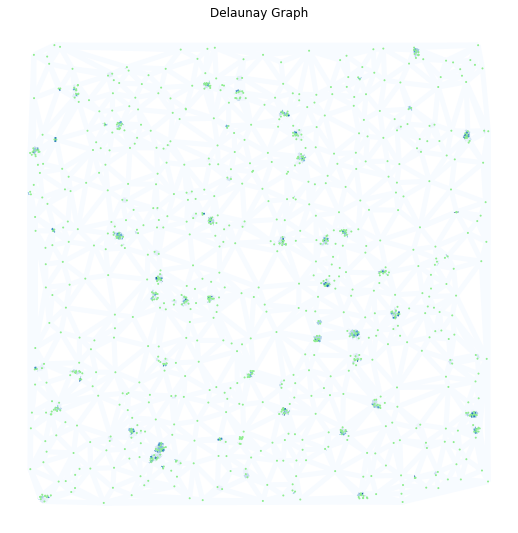

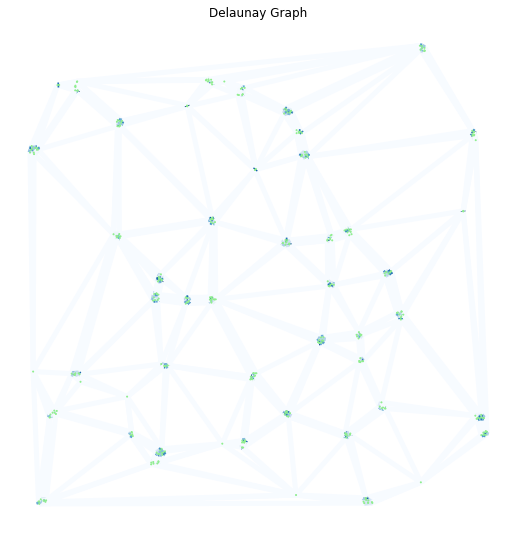

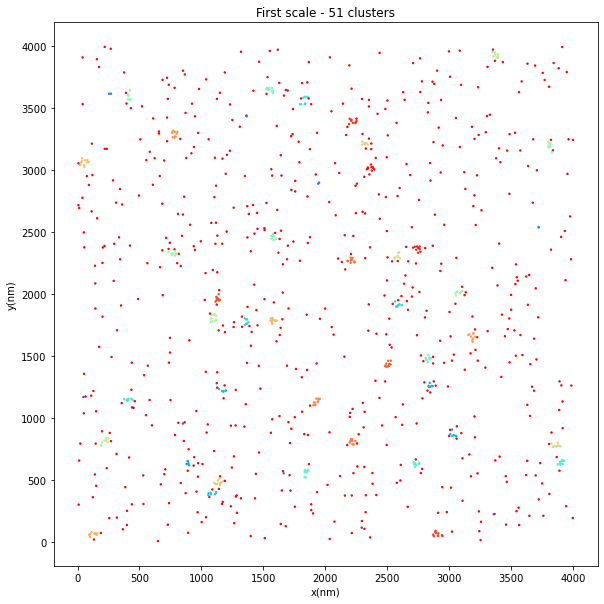

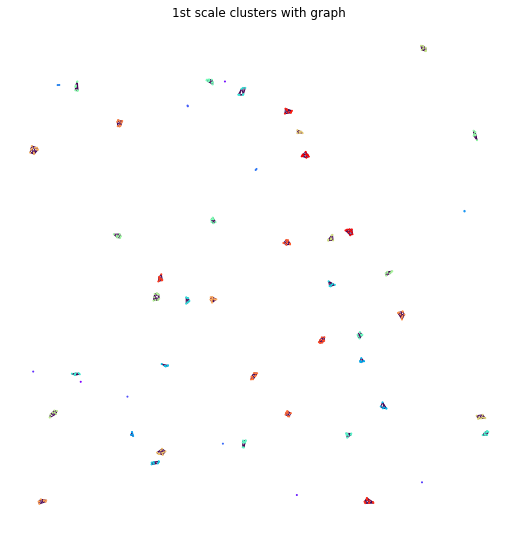

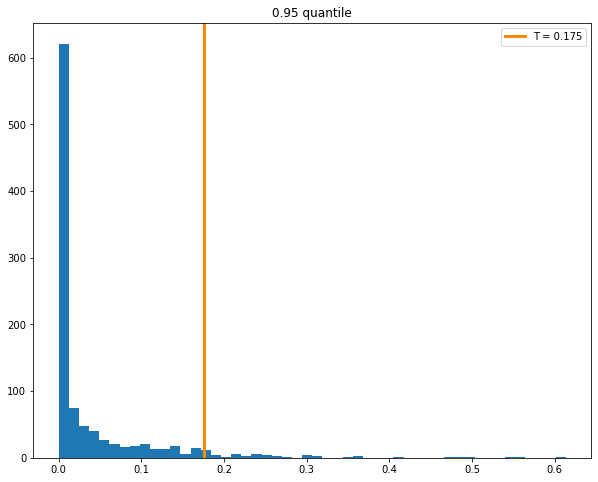

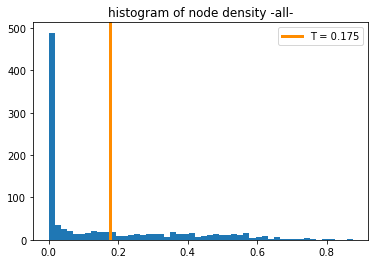

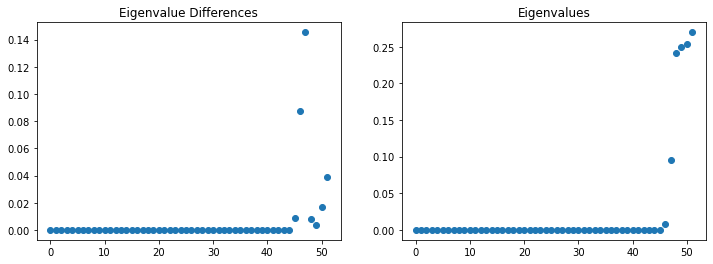

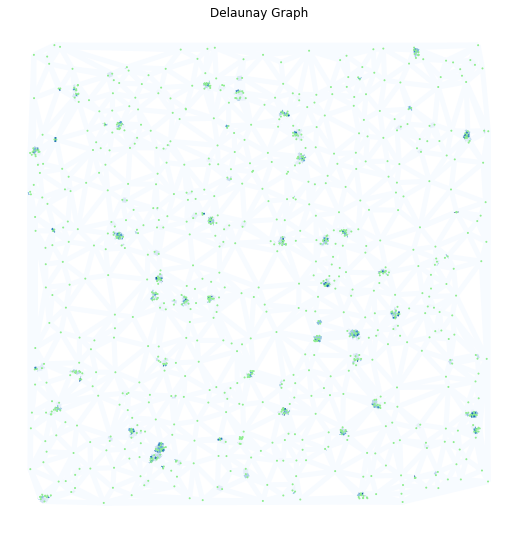

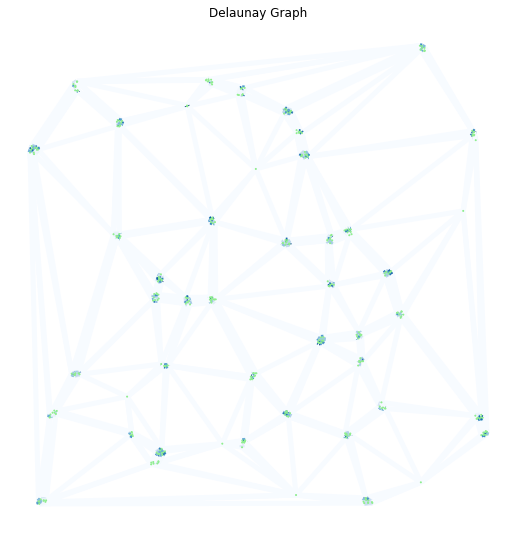

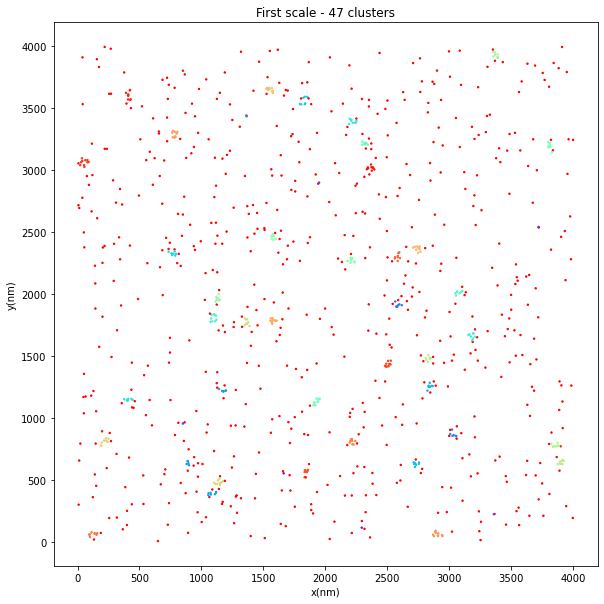

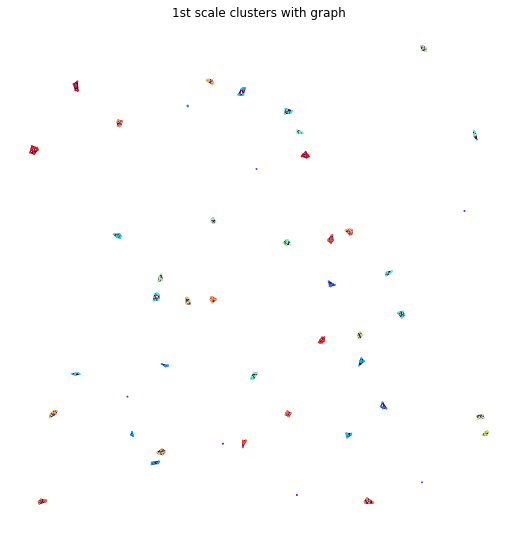

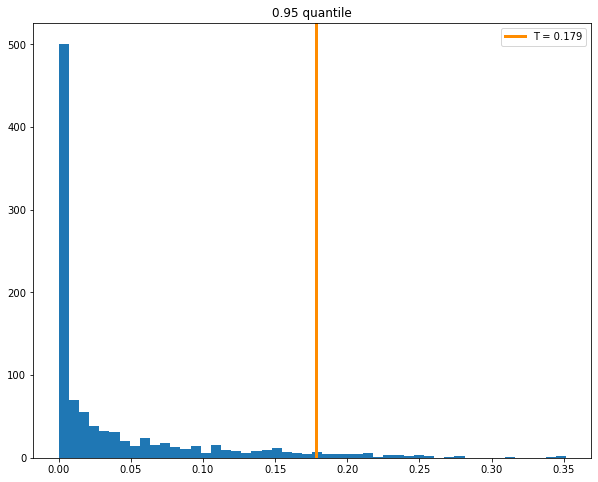

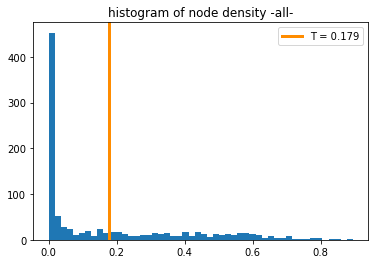

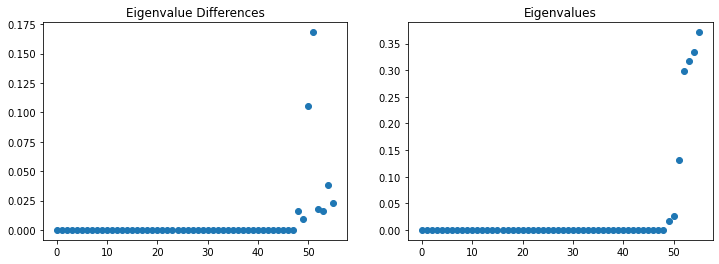

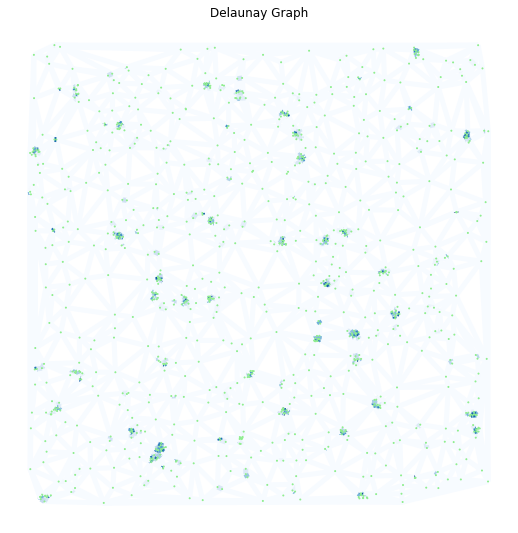

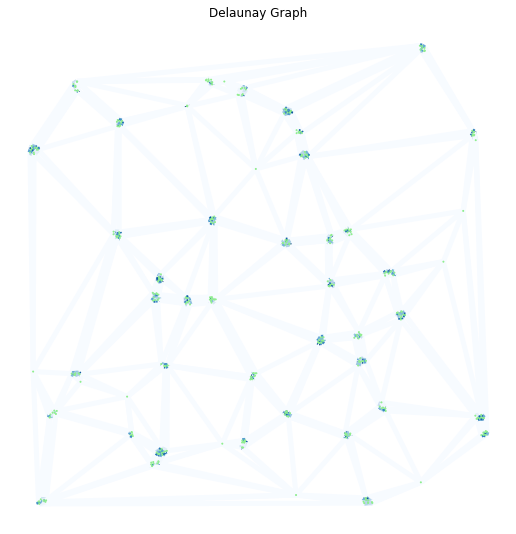

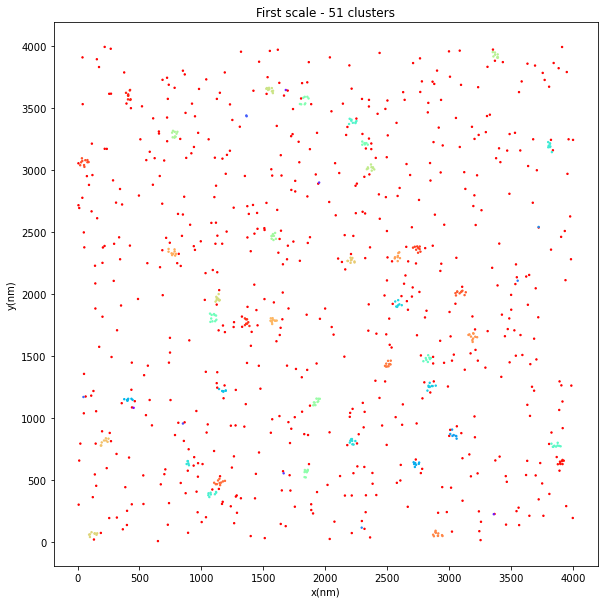

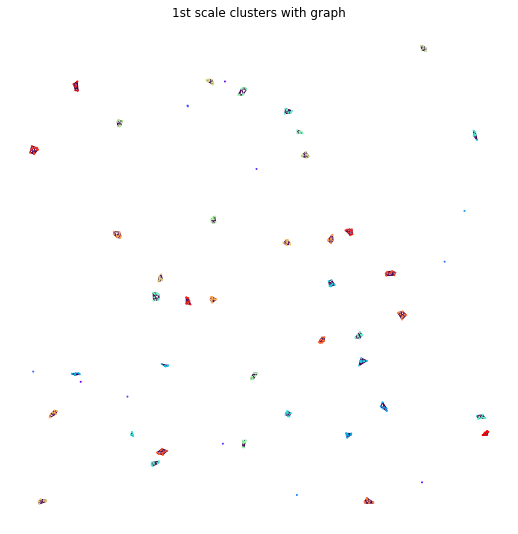

In [32]:
FMIs, Ns = grid_search(datagen, all_sigma_s, 5)

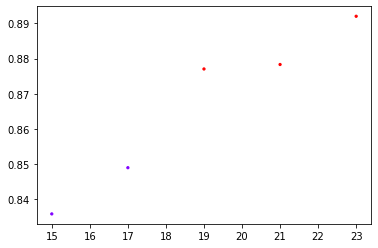

In [33]:
def correct_or_not(n):
    if n == 40: return 1
    if n != 40: return 2
    
colors = [correct_or_not(N) for N in Ns]

plt.scatter(all_sigma_s, FMIs, c = colors, cmap = 'rainbow_r', s = 5)


In [34]:
Ns

[38, 38, 40, 40, 40]

In [12]:
LocPerCluster = []
LocInNoise = []
labs = pd.Series(labels_clean)
for clus in labs.unique():
        if clus != 0:
            LocPerCluster.append(len(labs[(labs==clus)]))
        if clus == 0:
            LocInNoise.append(len(labs[(labs==clus)]))

NameError: name 'labels_clean' is not defined

In [111]:
labs.unique()

array([ 5.,  0., 20., 15., 28., 25., 18., 36., 11., 39.,  9.,  1., 21.,
       29., 34., 23., 32., 12., 14.,  2., 38., 19., 16.,  3.,  8., 10.,
       30., 24., 17., 27., 31., 26., 22., 40., 33., 37., 35., 13.,  6.,
        7.,  4.])

(array([ 3., 10.,  0., 10.,  0., 13.,  3.,  0.,  0.,  1.]),
 array([20. , 20.6, 21.2, 21.8, 22.4, 23. , 23.6, 24.2, 24.8, 25.4, 26. ]),
 <BarContainer object of 10 artists>)

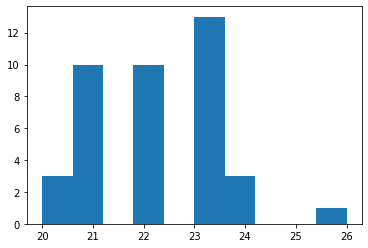

In [109]:
plt.hist(LocPerCluster)

Maintenant je vais faire la même chose mais avec wasserstein au lieu de euclidian (modification directement dans functions_for_graphic)
Je vais le faire avec le meme datagen qu'avant en le mettant en variable globale

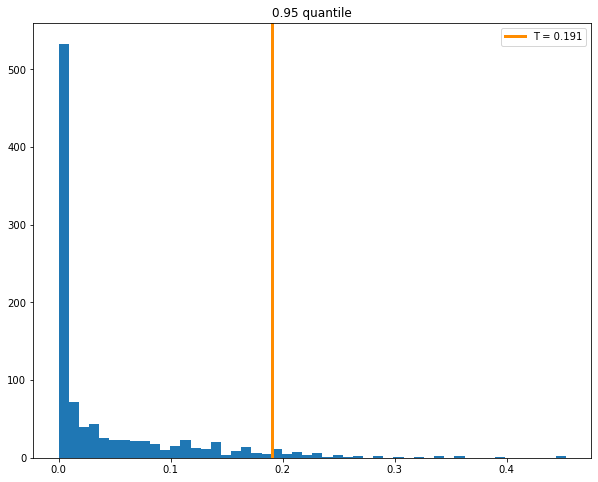

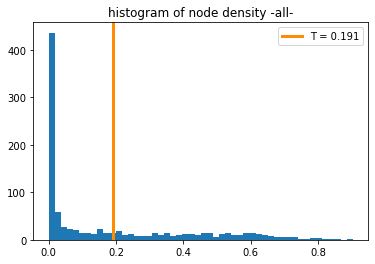

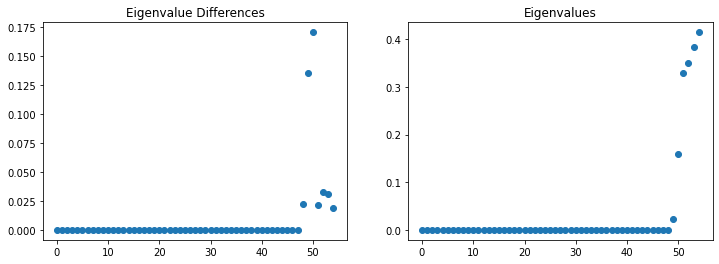

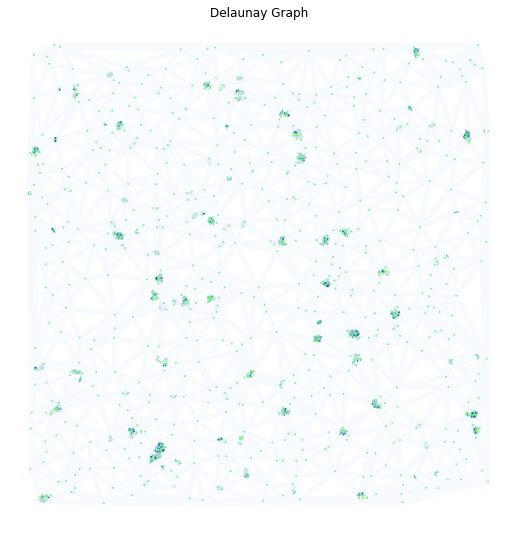

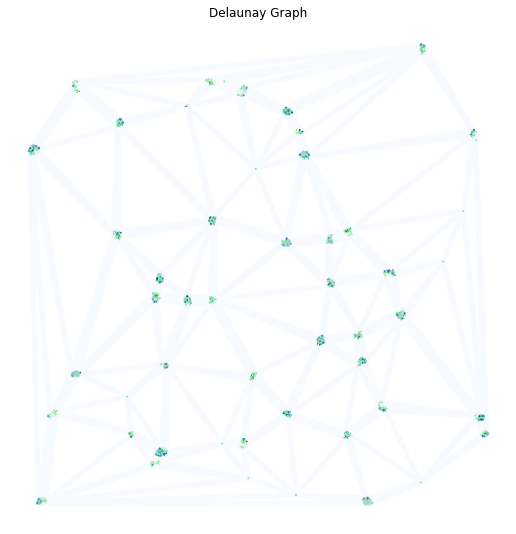

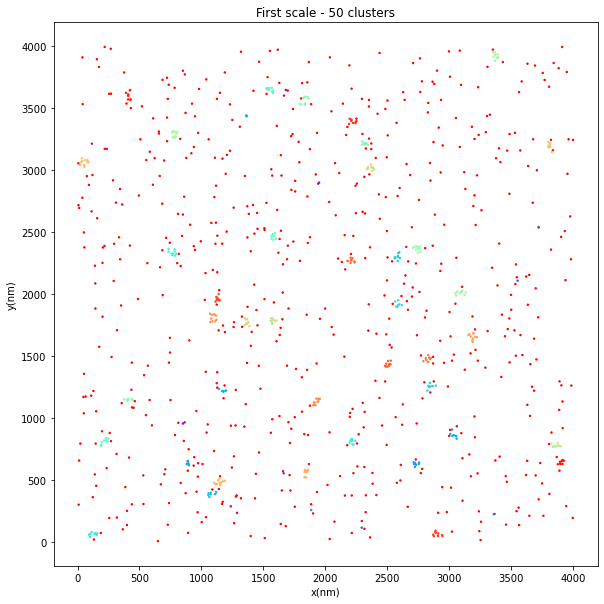

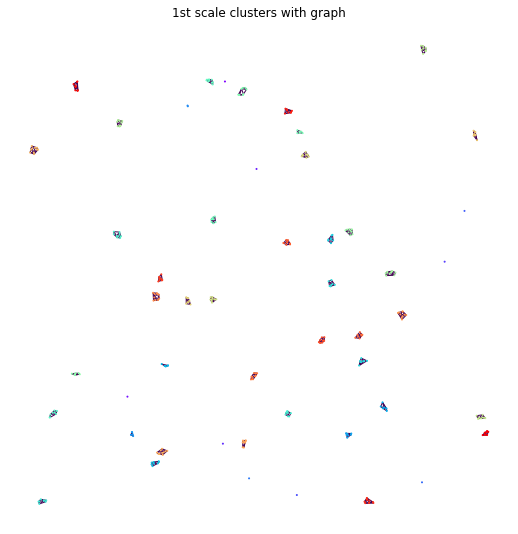

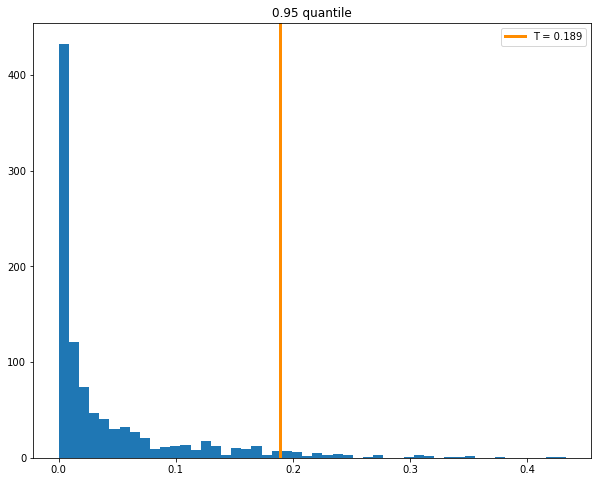

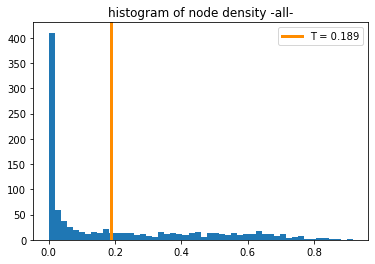

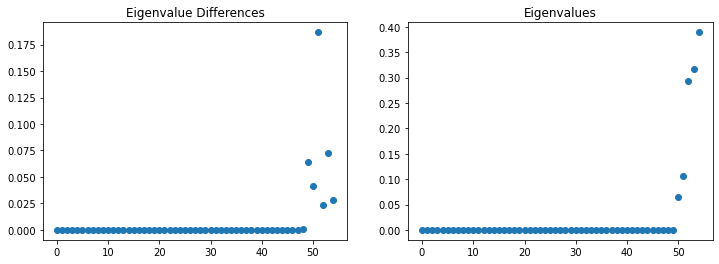

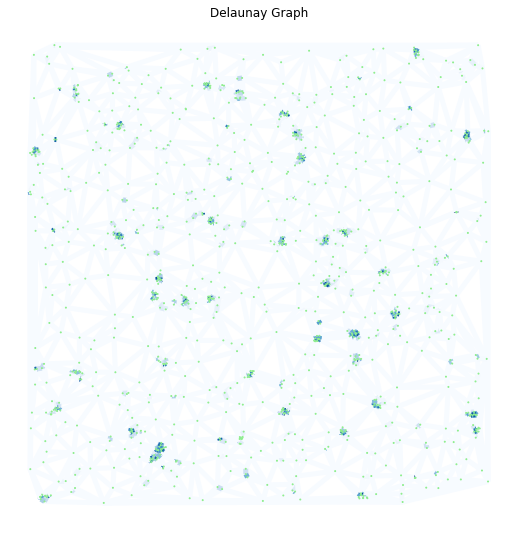

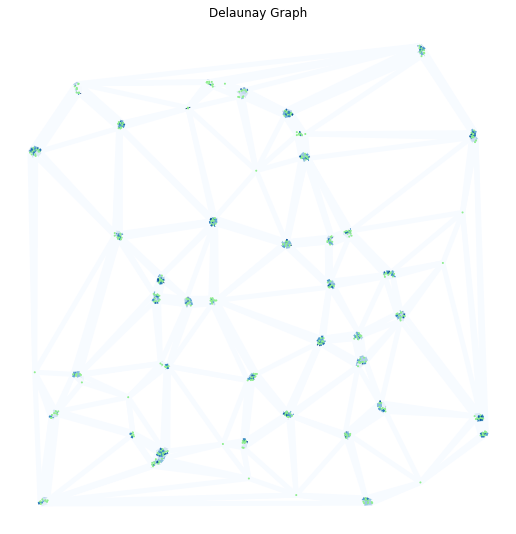

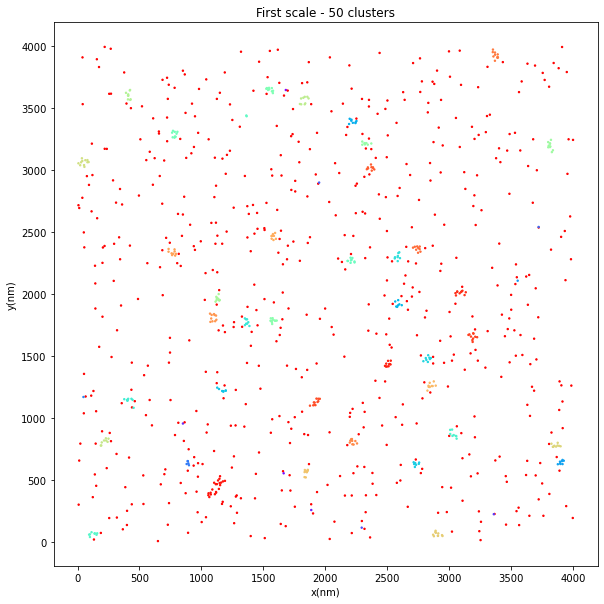

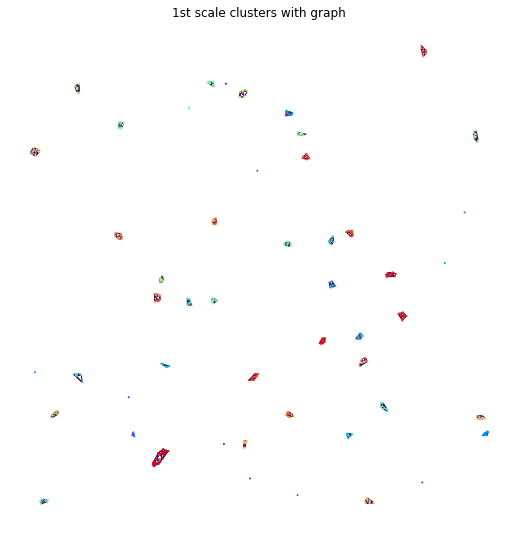

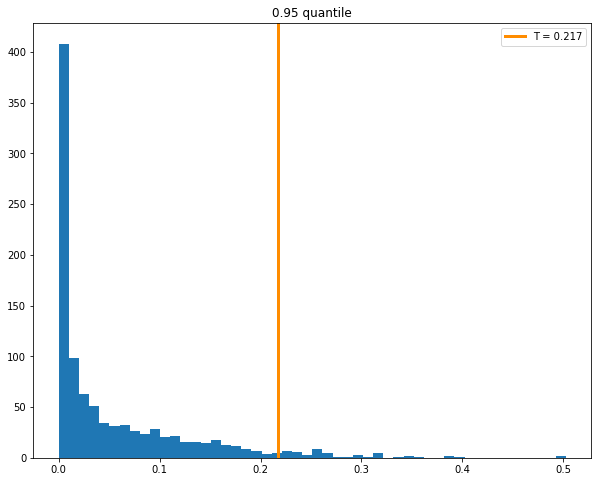

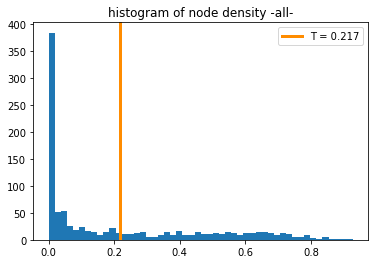

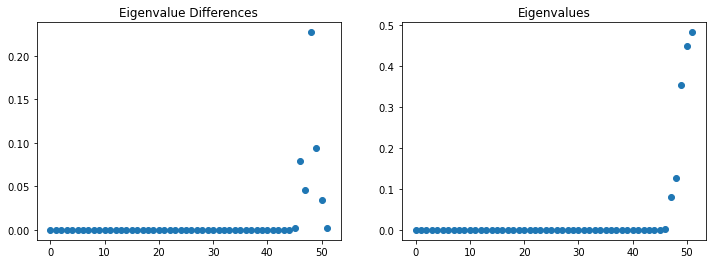

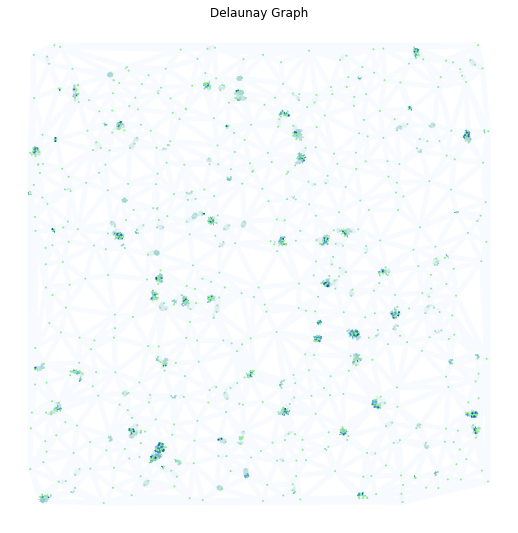

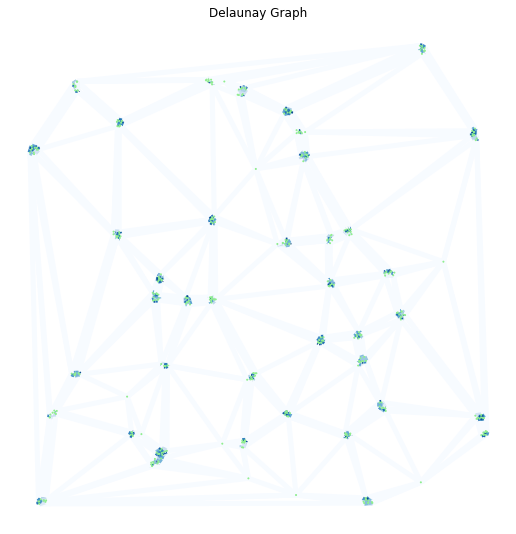

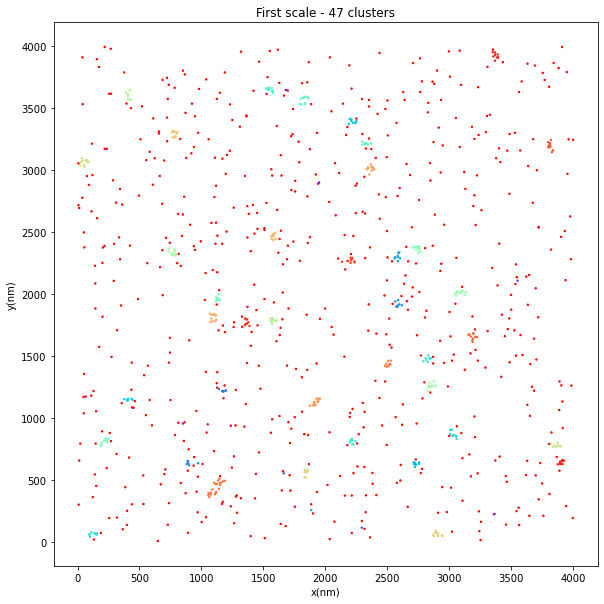

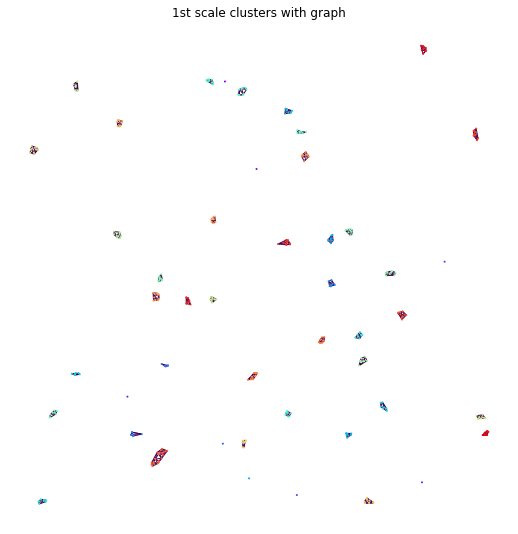

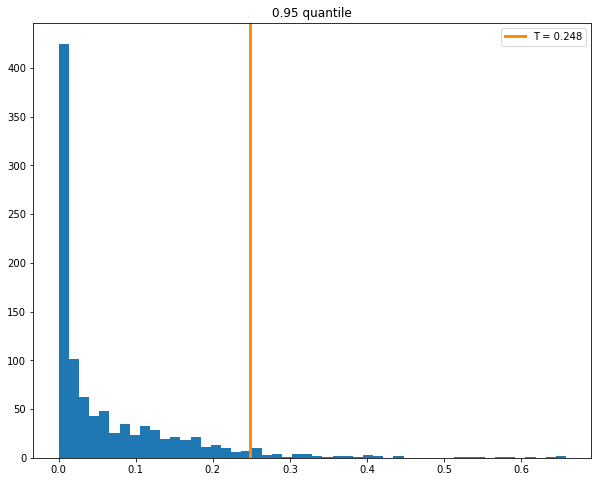

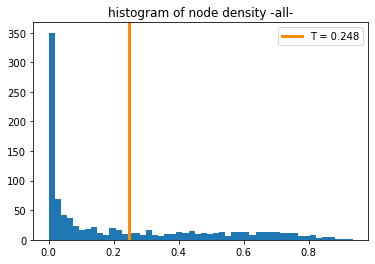

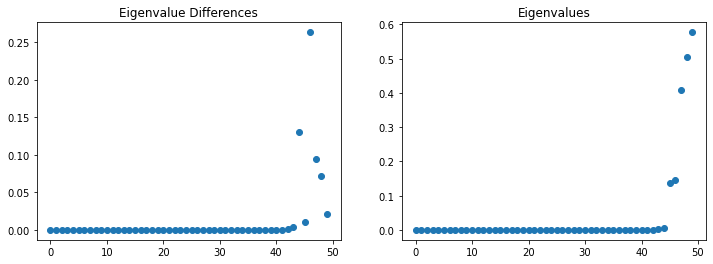

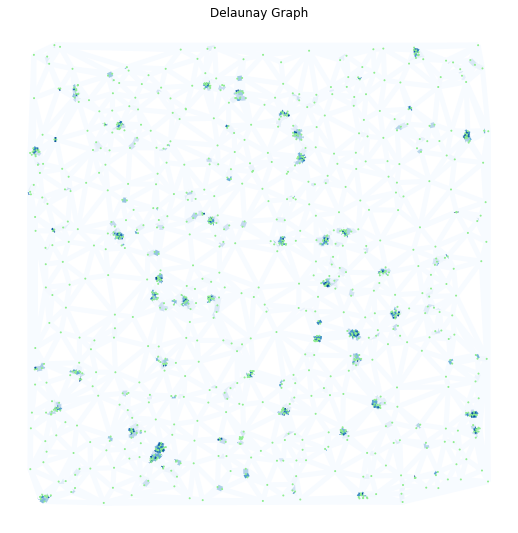

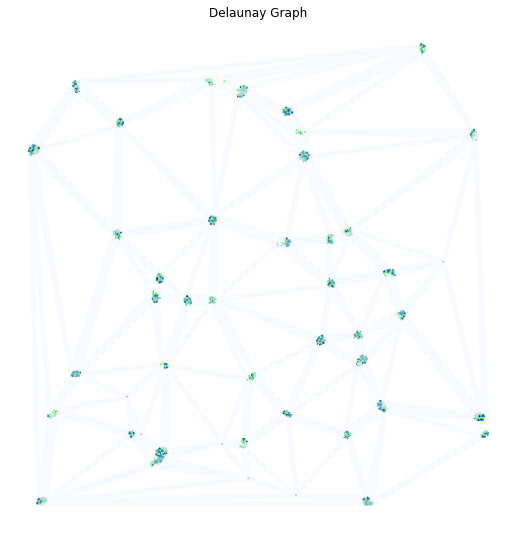

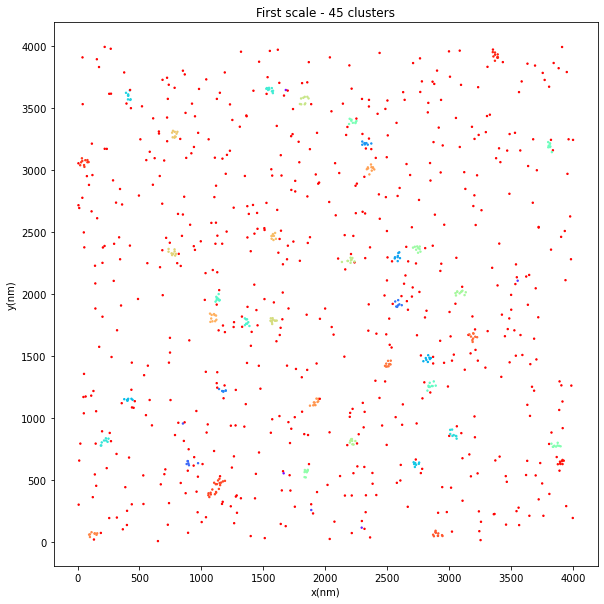

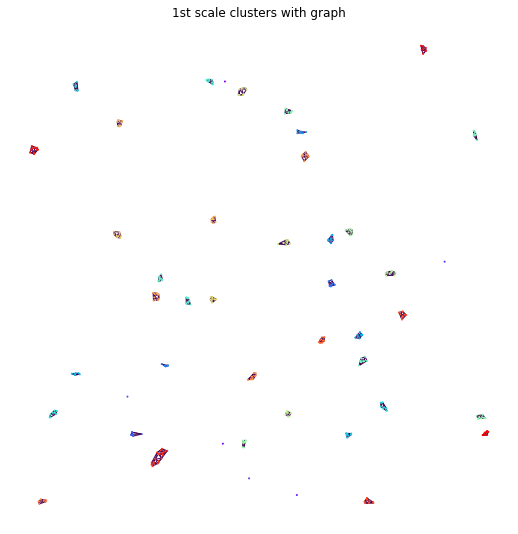

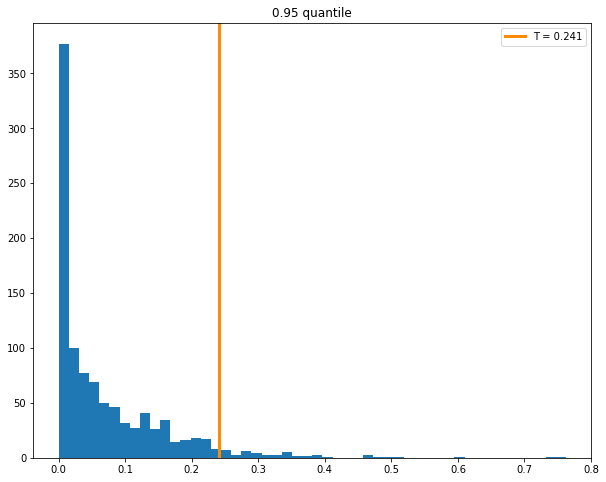

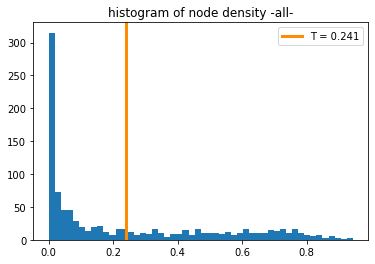

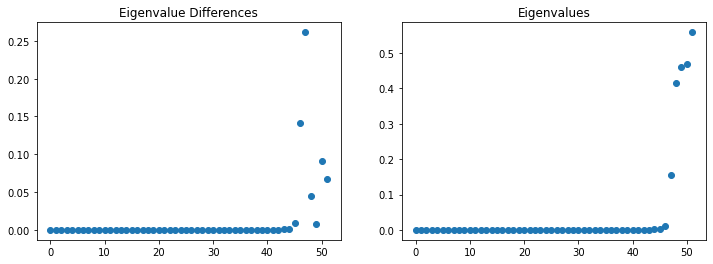

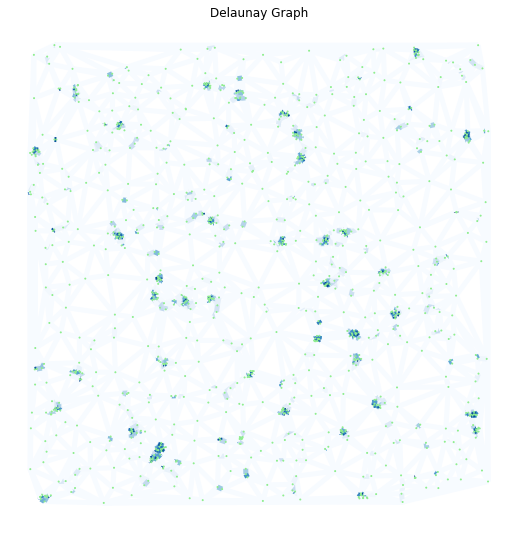

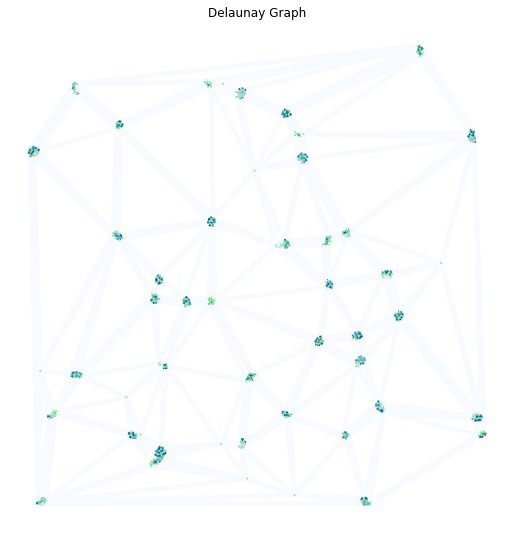

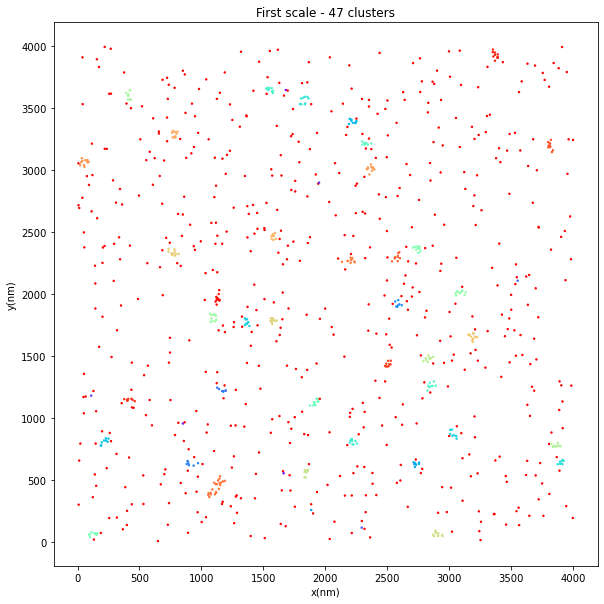

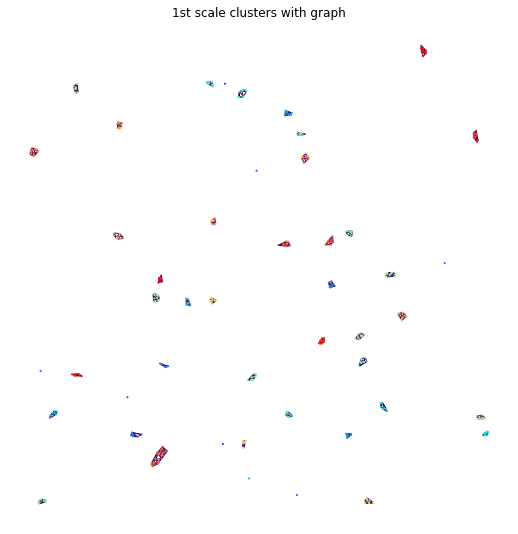

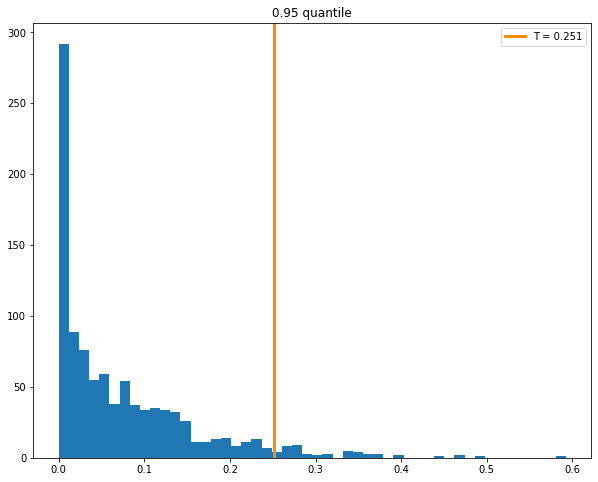

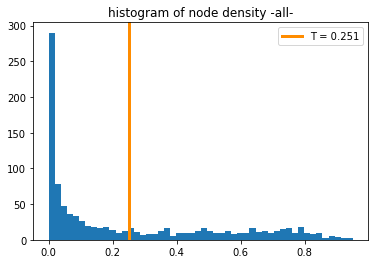

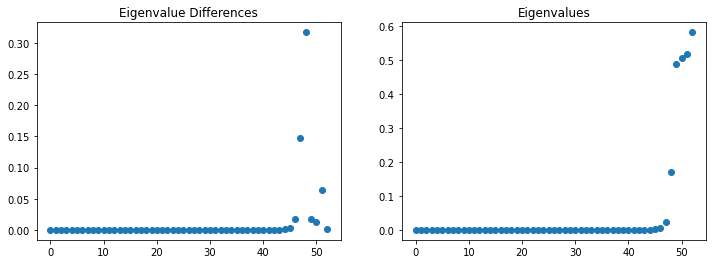

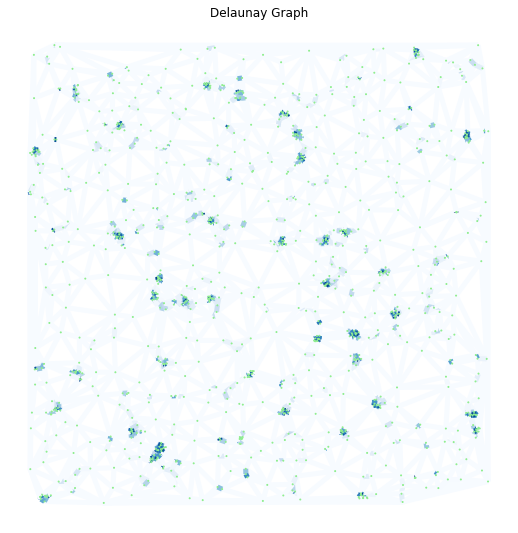

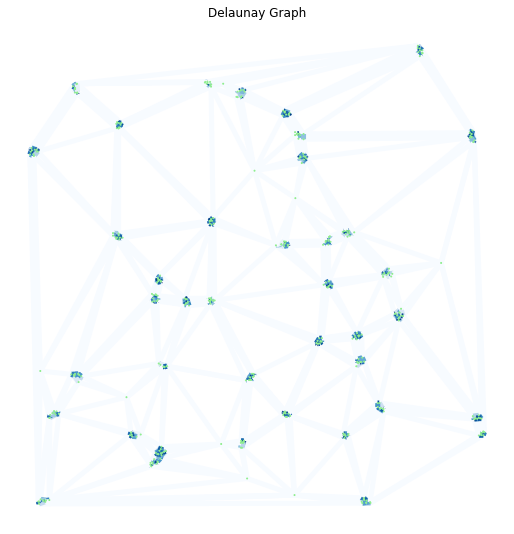

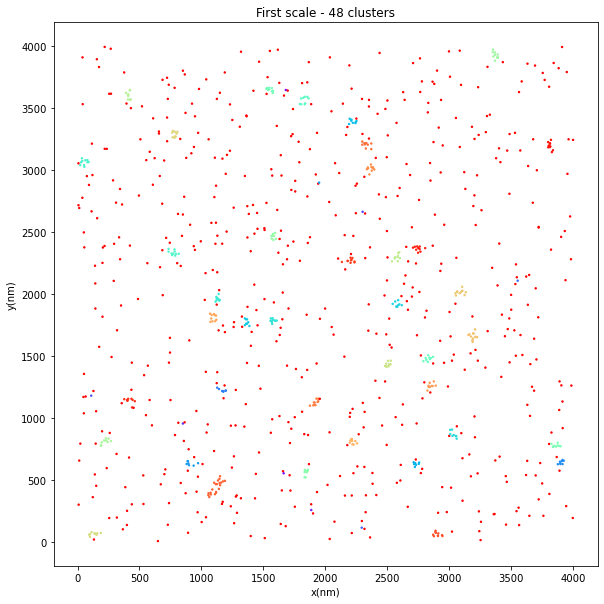

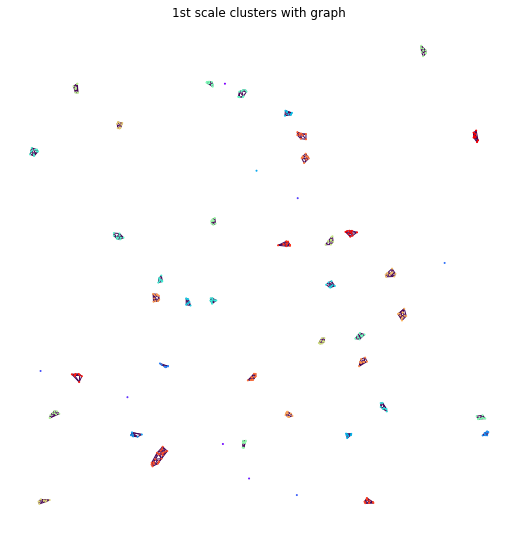

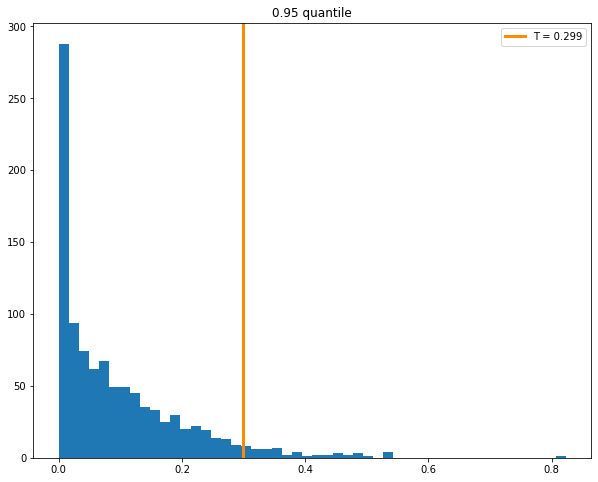

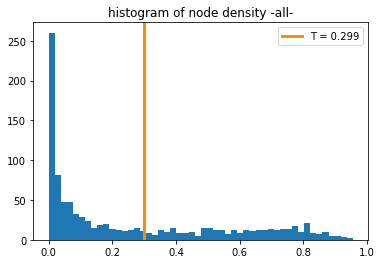

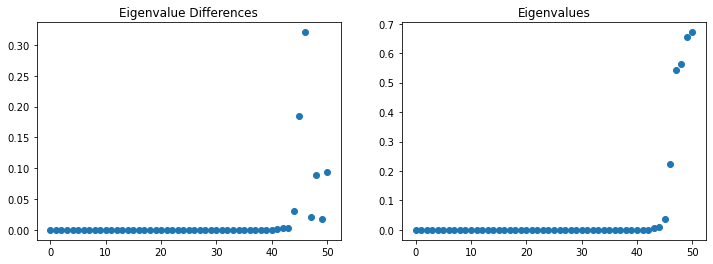

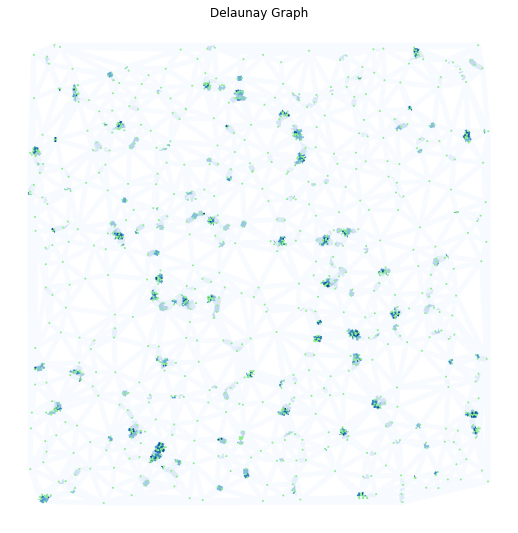

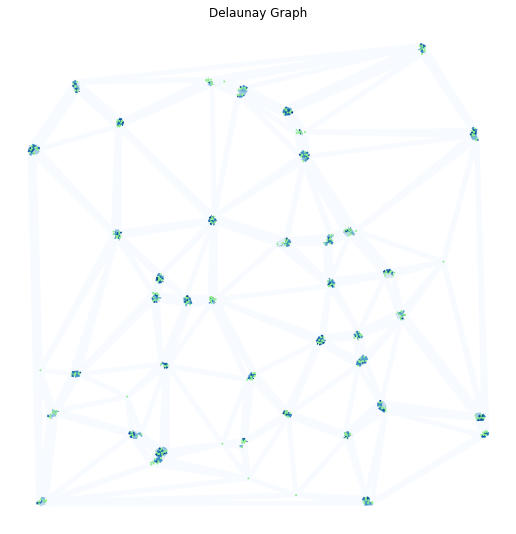

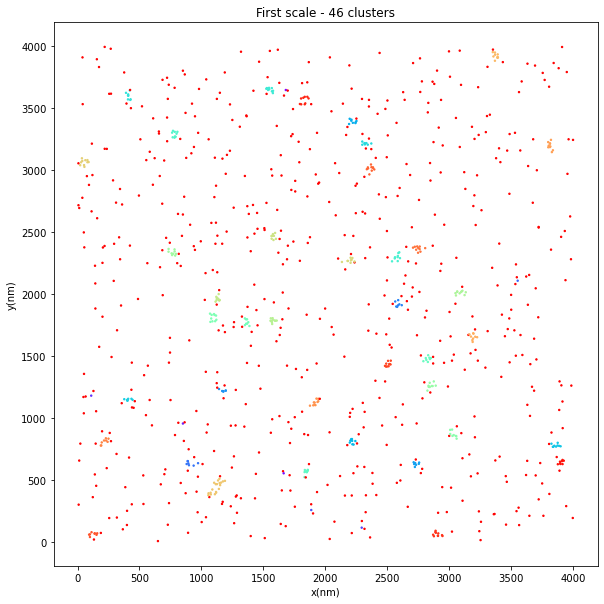

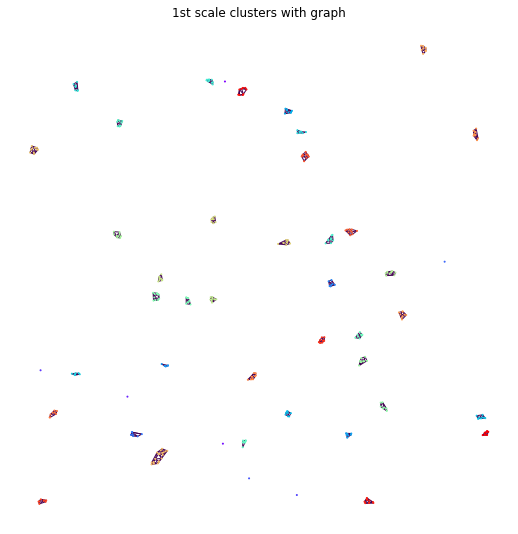

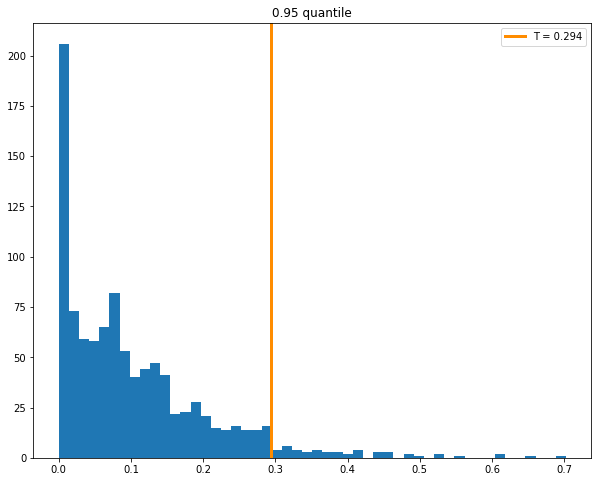

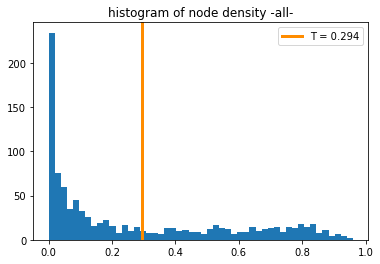

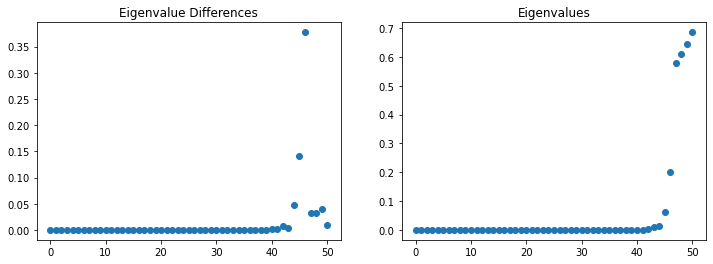

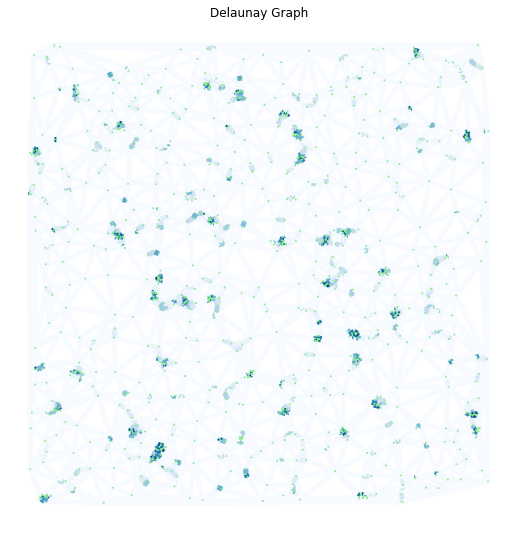

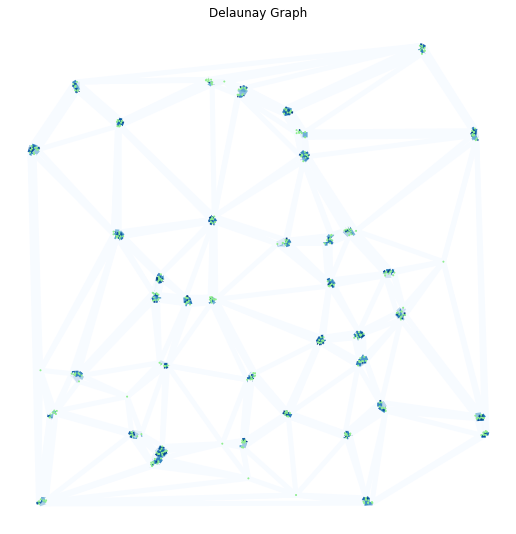

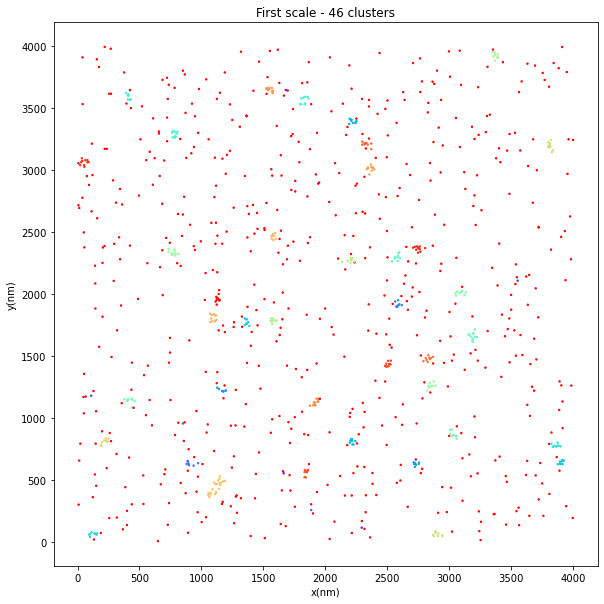

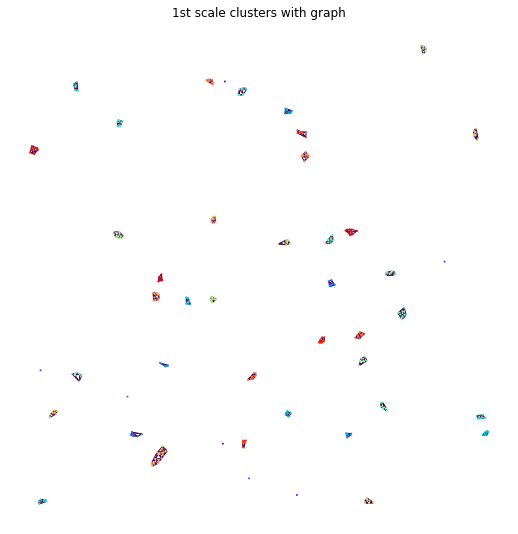

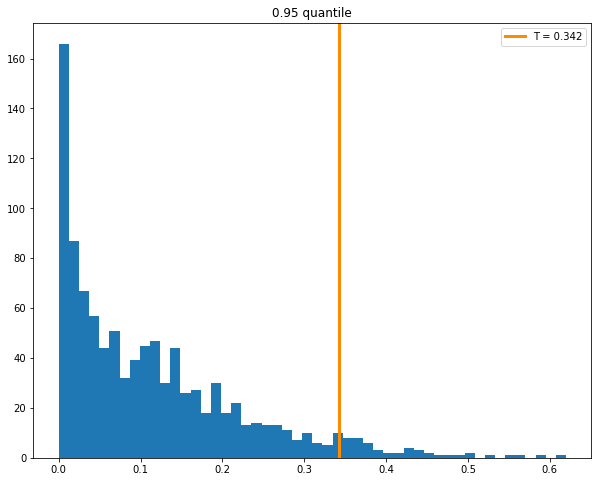

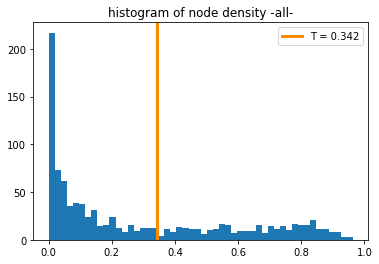

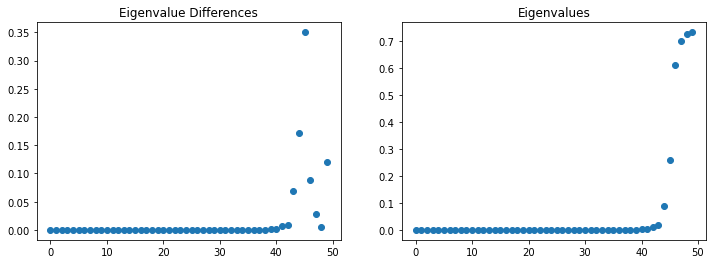

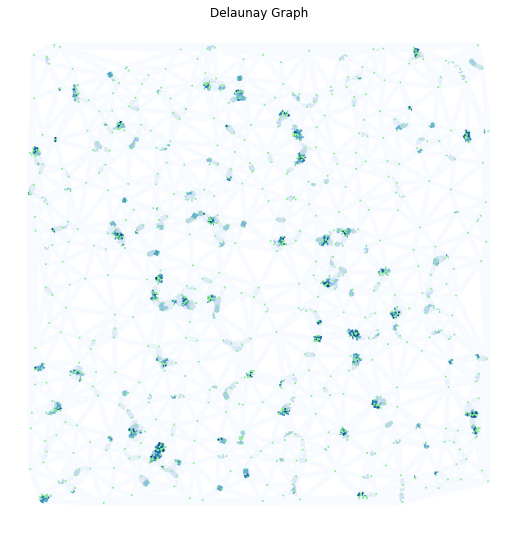

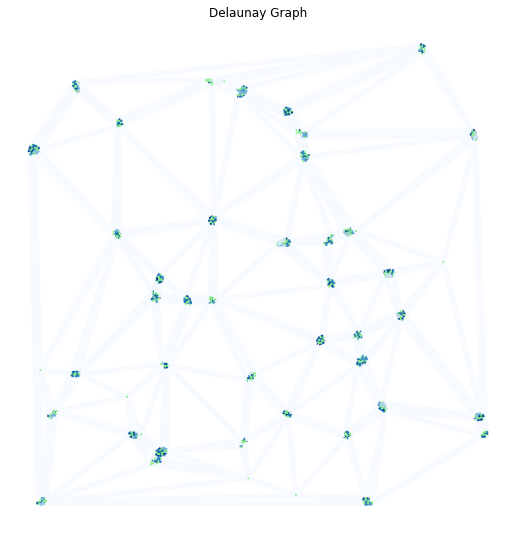

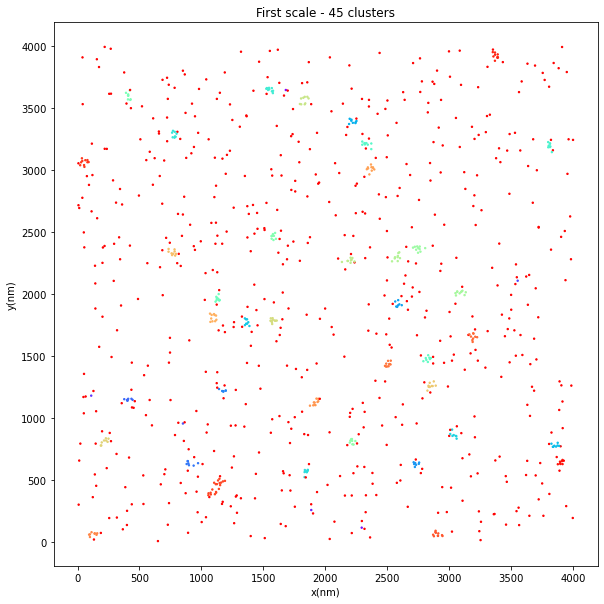

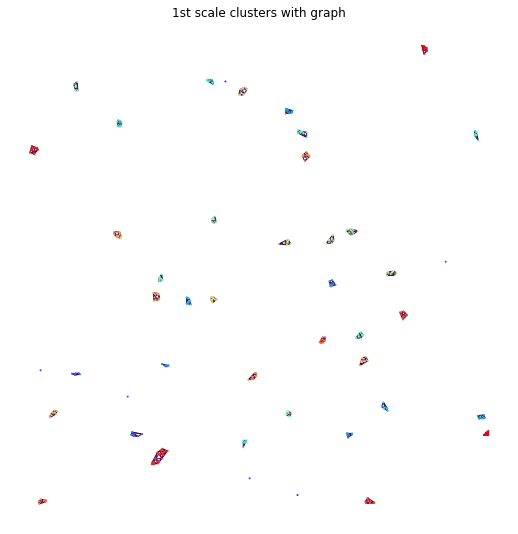

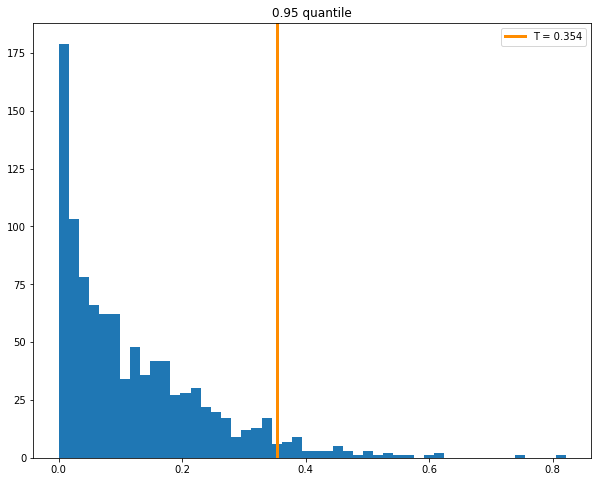

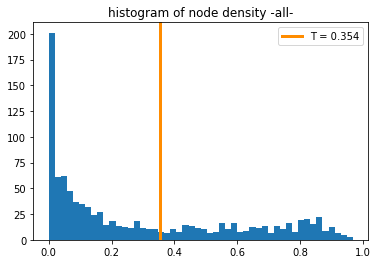

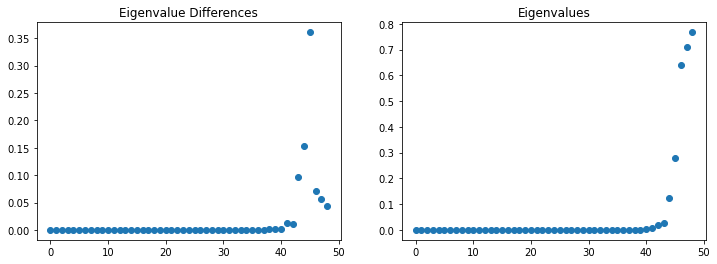

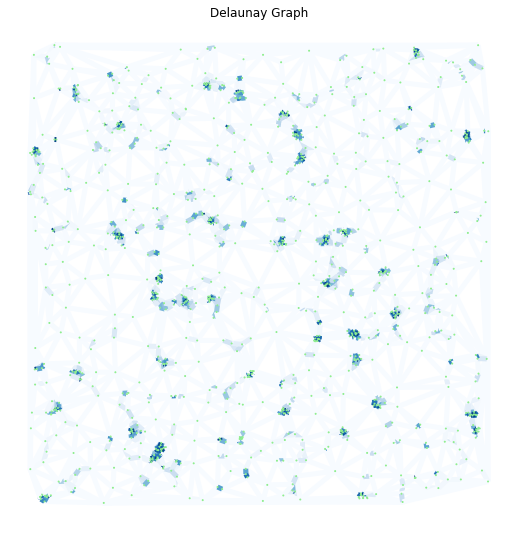

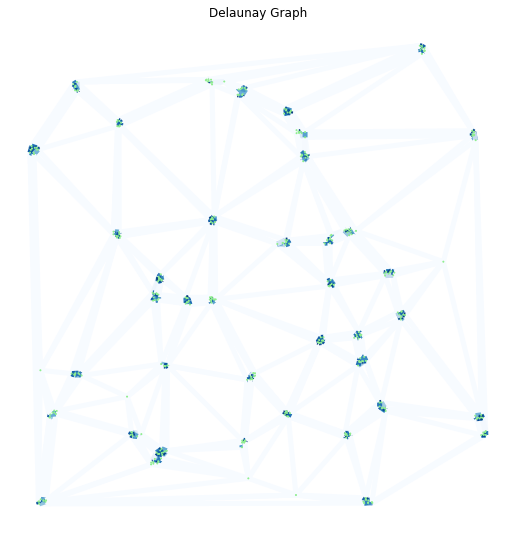

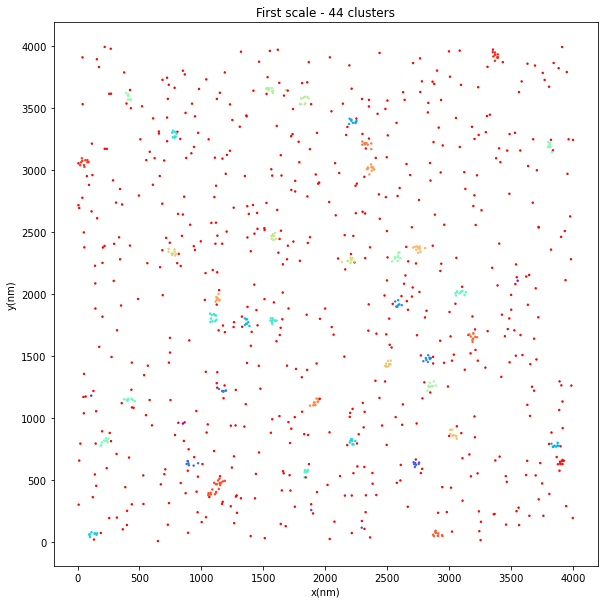

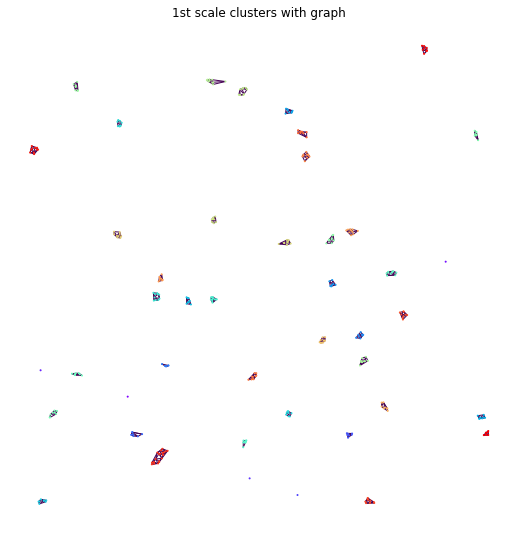

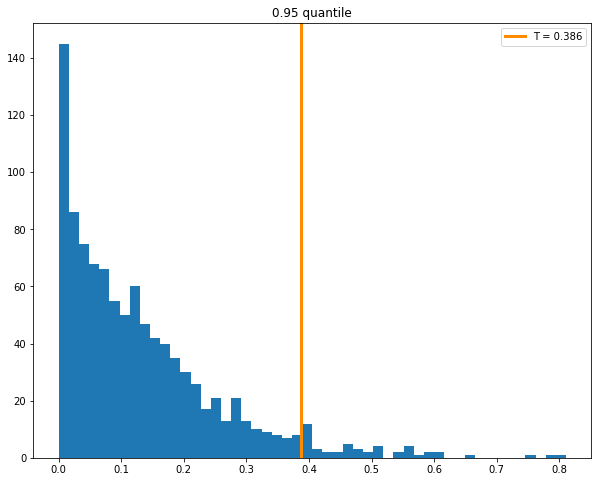

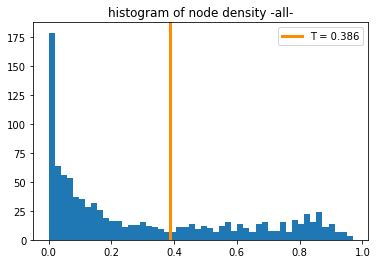

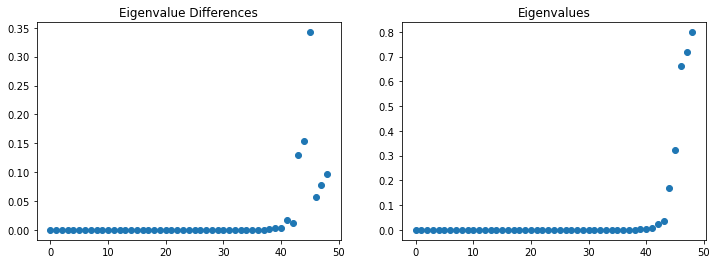

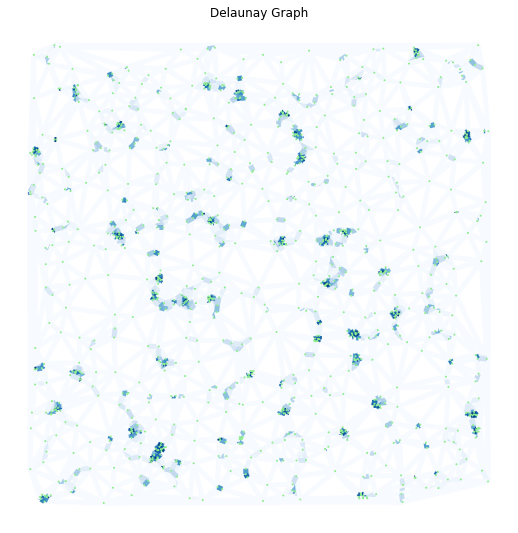

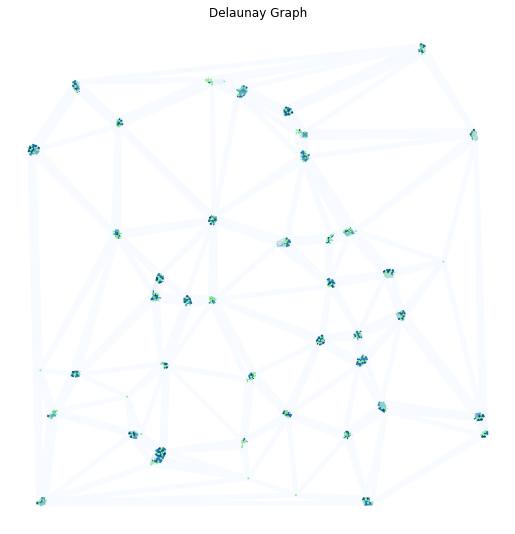

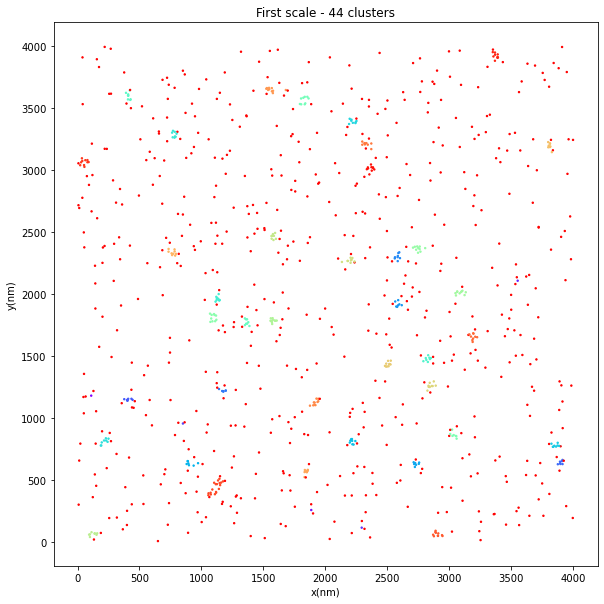

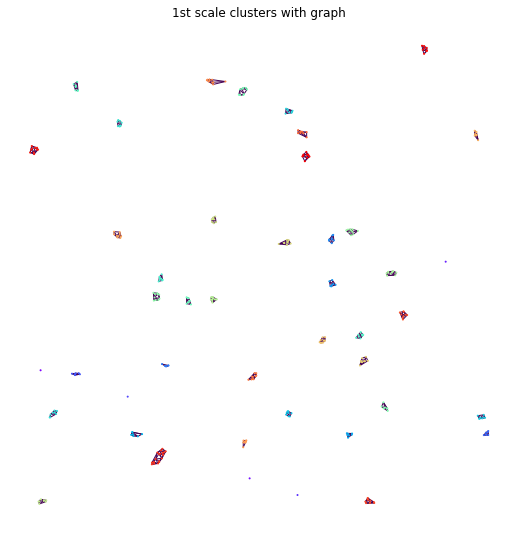

In [28]:
FMIs2, Ns2 = grid_search(datagen, all_sigma_s, 5)

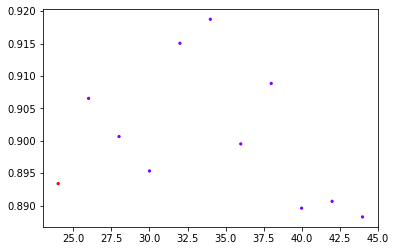

In [29]:
def correct_or_not(n):
    if n == 40: return 1
    if n != 40: return 2
    
colors = [correct_or_not(N) for N in Ns2]

plt.scatter(all_sigma_s, FMIs2, c = colors, cmap = 'rainbow_r', s = 5)

In [30]:
Ns2

[40, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39]